In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC



In [2]:
# Load the iris dataset
iris=datasets.load_iris()
X=iris.data
y=iris.target
X.shape,y.shape

((150, 4), (150,))

In [3]:
# Since there are 4 features let's decompose the features into lower Dimension via PCA
# and retaining the information as much as possible.

reduce=PCA(n_components=2).fit(X)
X=reduce.transform(X)
X.shape

(150, 2)

# Implementing SVM using Linear Kernel

In [4]:
# Since we just have 150 training samples, splitting the dataset into training and testing
# won't help us accurately estimate the error rate.
svmclf=SVC(kernel='linear',random_state=1)
scores=cross_val_score(svmclf,X,y,cv=5)
scores.mean()

0.9666666666666668

Thus, we can safely say that the SVM gives us with an accuracy of 96.6%.

In [5]:
# F'n to plot the decision Boundary
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers=['s','x','o','^','v']
    colors=('red','blue','lightgreen','gray','cyan')
    # get different colors for different classes present in 'y'.
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface.
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    
    # We use the min and the max values of above 2 features create a pair of grid arrays 
    # xx1 and xx2 via np.meshgrid()
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
    
    # Since we have trained our model of 2 featuers we need to flatten the grid arrays and
    # create a matrix that has the same number of columns as the Iris training dataset so that we can
    # use the `predict` method.
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    # Plotting the contour along with the predicted values
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot the class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],           # Acts as a boolean mask and select the features as per the index where
                    y=X[y==cl,1],           # values comes out to be true
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

/var/folders/q6/43vsmv9x2pz_q1psr6pkrlyh0000gn/T/ipykernel_3615/3475553046.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],           # Acts as a boolean mask and select the features as per the index where


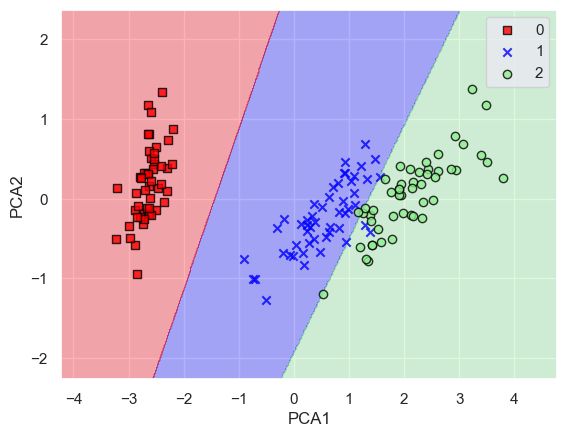

In [6]:
# Let's visualise the Decision Boundary, but first let's fit the classifier
svmclf.fit(X,y)
plot_decision_regions(X,y,classifier=svmclf)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.show()

With the kernel given as 'linear' to the SVM it behaves very much similar to the LogisticRegression and if we compare the decision boundary it is almost the same.

# SVM : 'rbf' Kernel

(rbf : Radial Basis Function) also known as **Gaussian Kernel** <br>

For solving a non-linear problem using an SVM, we transform the training data into higher dimension by using some mapping function $\phi$ which then makes the linear decision boundary in higher dimension.

In [7]:
# Let's implement kernel='rbf' (i.e. default value)
# Note that hyperparameter 'gamma' is inversely proportional to std. deviation
# hyperparameter C is inversely proportional to regularisation Parameter.

svmclf=SVC(kernel='rbf',gamma=0.2,random_state=1,C=1)
svmclf.fit(X,y)

SVC(C=1, gamma=0.2, random_state=1)

/var/folders/q6/43vsmv9x2pz_q1psr6pkrlyh0000gn/T/ipykernel_3615/3475553046.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],           # Acts as a boolean mask and select the features as per the index where


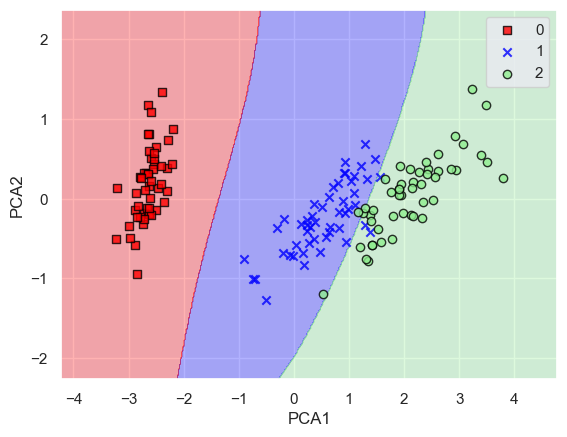

In [8]:
# Now let's visualise this decisoin boundary
plot_decision_regions(X,y,classifier=svmclf)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.show()

### Understanding the effect of $\gamma$ 

/var/folders/q6/43vsmv9x2pz_q1psr6pkrlyh0000gn/T/ipykernel_3615/3475553046.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],           # Acts as a boolean mask and select the features as per the index where


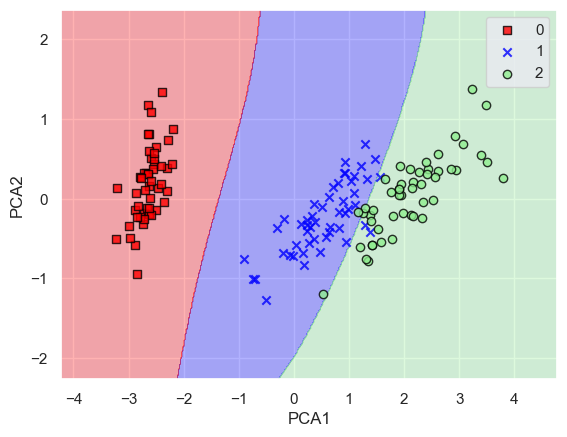

/var/folders/q6/43vsmv9x2pz_q1psr6pkrlyh0000gn/T/ipykernel_3615/3475553046.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],           # Acts as a boolean mask and select the features as per the index where


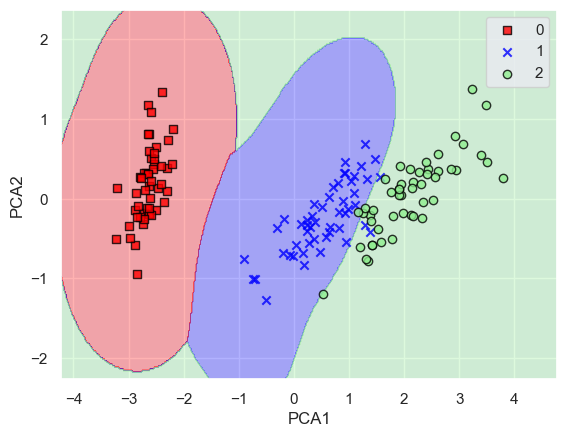

/var/folders/q6/43vsmv9x2pz_q1psr6pkrlyh0000gn/T/ipykernel_3615/3475553046.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],           # Acts as a boolean mask and select the features as per the index where


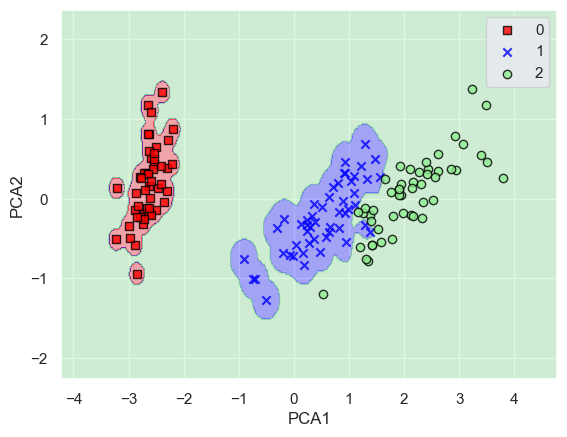

In [9]:
for g in [0.2,1,100]:
    svmclf=SVC(gamma=g,C=1,random_state=1).fit(X,y)
    plot_decision_regions(X,y,classifier=svmclf)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend(loc='best')
    plt.show()

 Hence, we can see that as we increase the value of $\gamma$ the value of $\sigma$ deacreas and makes the model more prone to `Generalisation Error` (i.e. High Bias) and vice versa results in the problem of High Variance.

# Testing Custom SVM

In [14]:
from SVMGD import SVM
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [13]:
X , y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y==0,-1,1)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=123)
x_train.shape, x_test.shape

((40, 2), (10, 2))

In [16]:
clf = SVM()
clf.fit(x_train, y_train)

In [29]:
y_pred = clf.predict(x_test)
(y_test == y_pred).sum()/y_test.shape[0]

1.0

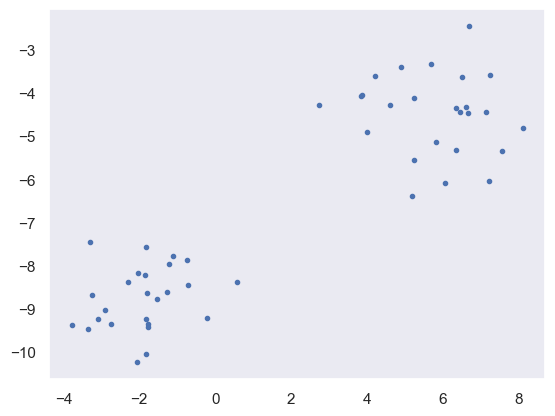

In [35]:
plt.plot(X[:,0],X[:,1], '.')
plt.grid(False)